In [1]:
import sys
sys.path.append("..")

In [2]:
from library.simulator import BackTester, Runner
from library.strategy import GcStrategy, RunnerwithStrategy
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# CSVデータを読み込む
df = pd.read_csv(
    "../input_data/btf_periods900.csv",
)
# UNIXtimeをpandas.Timestampに変換する
df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")

rename_dict = {
    "CloseTime": "timestamp",
    "OpenPrice": "open",
    "HighPrice": "high",
    "LowPrice": "low",
    "ClosePrice": "close",
    "Volume": "volume",
}
df = df[list(rename_dict.keys())].rename(columns=rename_dict).set_index("timestamp")

config = {"slippage": 0.001, "minutes_to_expire": 60}
tester = BackTester(df, config)
strategy = GcStrategy(length_long=30, length_short=15, length_expire=10)
runner = RunnerwithStrategy(tester=tester, strategy=strategy)
runner.run()
snapshots = tester.snapshots
print(snapshots)

                               cash  position       valuation
timestamp                                                    
2023-01-26 21:45:00  1000000.000000  0.000000  1000000.000000
2023-01-26 22:00:00  1000000.000000  0.000000  1000000.000000
2023-01-26 22:15:00  1000000.000000  0.000000  1000000.000000
2023-01-26 22:30:00  1000000.000000  0.000000  1000000.000000
2023-01-26 22:45:00  1000000.000000  0.000000  1000000.000000
...                             ...       ...             ...
2023-04-04 02:45:00   977937.404508  0.005658   998952.715066
2023-04-04 03:00:00   977937.404508  0.005658   998906.920054
2023-04-04 03:15:00   977937.404508  0.005658   998919.175058
2023-04-04 03:30:00   977937.404508  0.005658   998979.041257
2023-04-04 03:45:00   977937.404508  0.005658   998947.589012

[6454 rows x 3 columns]


In [23]:
for order in tester.archived_orders:
    print(order.__dict__)

{'id': 1136, 'timestamp': Timestamp('2023-01-27 06:30:00'), 'side': 'BUY', 'size': 0.0033373359115365696, 'completion_time': Timestamp('2023-01-27 06:45:00'), 'completion_status': 'executed'}
{'id': 1137, 'timestamp': Timestamp('2023-01-27 09:00:00'), 'side': 'SELL', 'size': 0.0033373359115365696, 'completion_time': Timestamp('2023-01-27 09:15:00'), 'completion_status': 'executed'}
{'id': 1138, 'timestamp': Timestamp('2023-01-27 15:45:00'), 'side': 'BUY', 'size': 0.003329581025221813, 'completion_time': Timestamp('2023-01-27 16:00:00'), 'completion_status': 'executed'}
{'id': 1140, 'timestamp': Timestamp('2023-01-27 16:15:00'), 'side': 'BUY', 'size': 0.0033113520122960063, 'completion_time': Timestamp('2023-01-27 16:30:00'), 'completion_status': 'executed'}
{'id': 1139, 'timestamp': Timestamp('2023-01-27 18:15:00'), 'side': 'SELL', 'size': 0.003329581025221813, 'completion_time': Timestamp('2023-01-27 18:30:00'), 'completion_status': 'executed'}
{'id': 1141, 'timestamp': Timestamp('202

- ポジション解消に失敗している

In [25]:
snapshots.loc['2023-02-18 06:15:00']

cash         989361.485825
position          0.002995
valuation    999251.708603
Name: 2023-02-18 06:15:00, dtype: float64

In [29]:
for o in tester.archived_orders:
    if o.id == 1219:
        print(o.side, o.size, o.completion_status)

SELL 0.0029947684413988763 invalid


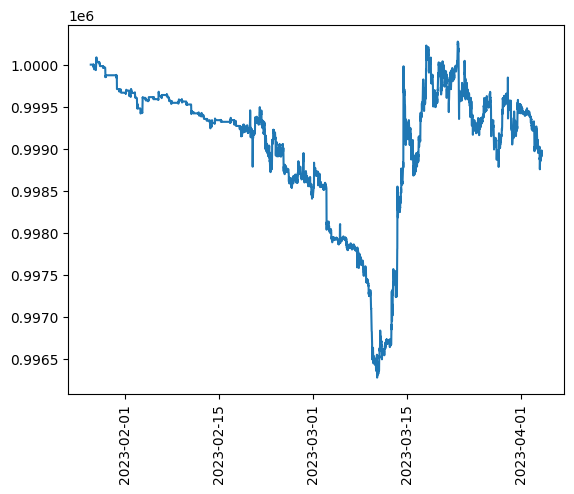

In [21]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["valuation"])
plt.show()

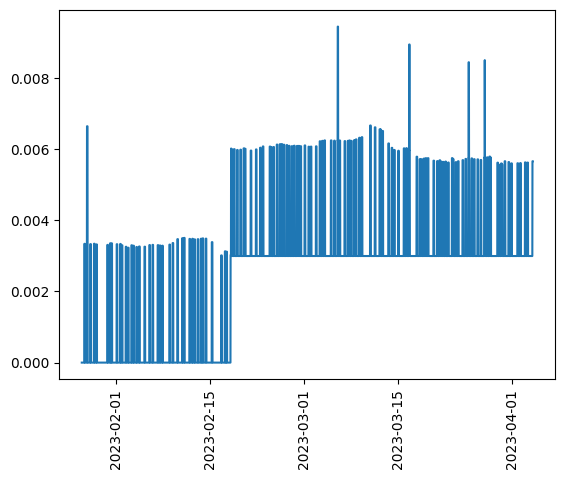

In [22]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(snapshots.index, snapshots["position"])
plt.show()